In [1]:
#Wroking on classification
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#Checking how many rows and columns
df.shape

(1025, 14)

In [4]:
#null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

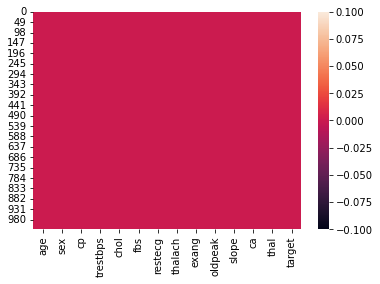

In [6]:
sns.heatmap(df.isnull())
plt.show()#visualisng

In [7]:
#There no nul values

1    526
0    499
Name: target, dtype: int64


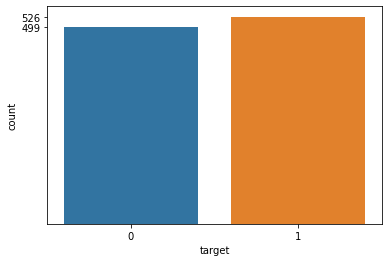

In [8]:
#checking our data set is balance or not
f=df["target"].value_counts()
print(f)
sns.countplot(data=df,x="target")
plt.yticks(f)
plt.show()
#Dataset is balanced

In [9]:
#selecting input and output
#performig model
X=df.drop("target",axis=1)
Y=df["target"]

In [10]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_test=ss.fit_transform(x_test)
x_train=ss.fit_transform(x_train)

In [12]:
#inbuilt function
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("confusion matrix:")
    #confusion matrix
    print(confusion_matrix(y_test,y_pred))
    return model

In [14]:
#Baseline model:import logistic regression model
from sklearn.linear_model import LogisticRegression

In [15]:
lc=LogisticRegression()

In [16]:
lc=create_model(lc)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       161
           1       0.73      0.92      0.82       147

    accuracy                           0.80       308
   macro avg       0.82      0.81      0.80       308
weighted avg       0.82      0.80      0.80       308

confusion matrix:
[[112  49]
 [ 12 135]]


In [17]:
#score is 92 of logiscticRegression


In [18]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [19]:
df=create_model(dt)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       161
           1       1.00      0.98      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

confusion matrix:
[[161   0]
 [  3 144]]


In [20]:
#Tree Givinig us 98 
#creating information Gain


In [21]:
IG=dt.feature_importances_
print(IG)

[0.05622303 0.06014196 0.27784246 0.05285365 0.10888221 0.
 0.02899166 0.04377281 0.02325496 0.11108607 0.04759162 0.10937655
 0.07998301]


In [22]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [23]:
#create A dataframe with sorting to disply information gain
dic={'Input':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values('Information_Gain',ascending=False,ignore_index=True)

,Input,Information_Gain
0,cp,0.277842
1,oldpeak,0.111086
2,ca,0.109377
3,chol,0.108882
4,thal,0.079983
5,sex,0.060142
6,age,0.056223
7,trestbps,0.052854
8,slope,0.047592
9,thalach,0.043773


In [24]:
from sklearn import tree
feature=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt,feature_names=feature,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [25]:
#pruning technique to reduce overfitting from decisiontreeclassifer

In [26]:
#1.max_depth
#1. max_depth parameter  
##create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=7,random_state=1)
#Note : max_depth can not more than 8
#by default use method : gini index

In [27]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       161
           1       0.95      0.98      0.96       147

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

confusion matrix:
[[153   8]
 [  3 144]]


In [28]:
from sklearn import tree
feature=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=feature,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [29]:
IG=dt1.feature_importances_
print(IG)

[0.04923496 0.05807075 0.2673896  0.06794946 0.10133126 0.
 0.01784109 0.05274351 0.02393937 0.11003402 0.05331364 0.10717266
 0.09097969]


In [30]:
#create A dataframe with sorting to disply information gain
dic={'Input':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values('Information_Gain',ascending=False,ignore_index=True)

,Input,Information_Gain
0,cp,0.267390
1,oldpeak,0.110034
2,ca,0.107173
3,chol,0.101331
4,thal,0.090980
5,trestbps,0.067949
6,sex,0.058071
7,slope,0.053314
8,thalach,0.052744
9,age,0.049235


In [31]:
dt2=DecisionTreeClassifier(min_samples_leaf=60,random_state=1)

In [32]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       161
           1       0.74      0.96      0.83       147

    accuracy                           0.82       308
   macro avg       0.84      0.82      0.82       308
weighted avg       0.85      0.82      0.82       308

confusion matrix:
[[111  50]
 [  6 141]]


In [33]:
IG=dt2.feature_importances_
print(IG)
column=X.columns

#creaet a dataframe
dic={'Input':column,'Information_Gain':IG}
df3=pd.DataFrame(dic)
df3.sort_values('Information_Gain',ascending=False)


[0.05588056 0.         0.51245074 0.         0.         0.
 0.         0.00426938 0.         0.01030447 0.         0.16231713
 0.25477772]


,Input,Information_Gain
2,cp,0.512451
12,thal,0.254778
11,ca,0.162317
0,age,0.055881
9,oldpeak,0.010304
7,thalach,0.004269
1,sex,0.000000
3,trestbps,0.000000
4,chol,0.000000
5,fbs,0.000000


In [34]:
#use of entropy method
#use entropy method of decisiontree 
#means -P(yes)*log2P(yes)-P(No)*log2(P(no))
#here log2 means base of log=2
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',
                           max_depth=3,random_state=1)
#bydefault criterion='gini' means 1-P(yes)^2-Q(no)^2

In [35]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       161
           1       0.76      0.94      0.84       147

    accuracy                           0.83       308
   macro avg       0.85      0.84      0.83       308
weighted avg       0.85      0.83      0.83       308

confusion matrix:
[[118  43]
 [  9 138]]


In [36]:
dt4=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=70,random_state=1)

In [37]:
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       161
           1       0.79      0.83      0.81       147

    accuracy                           0.81       308
   macro avg       0.81      0.82      0.81       308
weighted avg       0.82      0.81      0.82       308

confusion matrix:
[[129  32]
 [ 25 122]]


In [38]:
#Decition tree 
#gini index max depth=6 giving 96 score

In [39]:
'''Énsembling Technique:-
1.Naive Aggregation method
  a.Hard voting  b.soft voting
2.Bootstraping method
 a.Bagging   b.pasting  c.random forest tree
3.Boosting Technique
 a.ADA Boost   b.Gradient Boost  c.xtreme Gradient Boost(XGB)
4.Stacking classifier 
'''

'Énsembling Technique:-\n1.Naive Aggregation method\n  a.Hard voting  b.soft voting\n2.Bootstraping method\n a.Bagging   b.pasting  c.random forest tree\n3.Boosting Technique\n a.ADA Boost   b.Gradient Boost  c.xtreme Gradient Boost(XGB)\n4.Stacking classifier \n'

In [40]:
from sklearn.ensemble import RandomForestClassifier

#create object of randomforestclasifer
rfc=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1)


In [41]:
x_train.shape

(717, 13)

In [42]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       161
           1       0.97      0.99      0.98       147

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

confusion matrix:
[[157   4]
 [  2 145]]


In [43]:
#ADA Boosting :-ADA Boost making decision stump
#Apply ADA Boost on given dataset
from sklearn.ensemble import AdaBoostClassifier

In [44]:
#create the object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=100,random_state=1)
#n_Estimators can be <=100 means n_estimators can not be more then 100

In [45]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       161
           1       0.87      0.93      0.89       147

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

confusion matrix:
[[140  21]
 [ 11 136]]


In [46]:
#call Gradient Boosting class
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gb=GradientBoostingClassifier(n_estimators=30,random_state=1)

In [48]:
gb=create_model(gb)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       161
           1       0.84      0.99      0.91       147

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.92      0.91      0.91       308

confusion matrix:
[[134  27]
 [  2 145]]


In [49]:
from xgboost import XGBClassifier

In [50]:
xgb=XGBClassifier(n_estimators=25,reg_alpha=1,random_state=1)

In [51]:
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       161
           1       0.97      1.00      0.98       147

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

confusion matrix:
[[156   5]
 [  0 147]]


In [53]:
#polynomial kernel function (non-linear)
from sklearn.svm import SVC
#svc inbuilt class for non-linear data

In [54]:
poly_svc=SVC(random_state=1,kernel='poly')

In [56]:
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       161
           1       0.85      0.98      0.91       147

    accuracy                           0.91       308
   macro avg       0.92      0.91      0.91       308
weighted avg       0.92      0.91      0.91       308

confusion matrix:
[[136  25]
 [  3 144]]


In [55]:
#apply radial basis kernel function
radial_svc=SVC(random_state=1,kernel="rbf")

In [57]:
radial_svc=create_model(radial_svc)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       161
           1       0.84      0.98      0.90       147

    accuracy                           0.90       308
   macro avg       0.91      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308

confusion matrix:
[[133  28]
 [  3 144]]


In [58]:
 #Gradient boosting and svm are the best for this data set